In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from datetime import datetime

In [2]:
# Function
# I will create a function for this purpose. I will provide one variable at a time to the function, and it will return the analysis.


def summary_analysis_int(input_col):
    # Print summary statistics
    print(input_col)
    print()
    print()
    print(dataset[input_col].describe())

    # Create a figure with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap on the left
    sns.heatmap(dataset[[input_col, 'Time_taken']].corr(), ax=axs[0], annot=True, cmap='coolwarm')
    axs[0].set_title('Correlation Heatmap')

    # Scatterplot on the right
    sns.scatterplot(x=dataset[input_col], y=dataset['Time_taken'], ax=axs[1])
    axs[1].set_title('Scatterplot of Time_taken vs input_col')

    # Display plots
    plt.tight_layout()
    plt.show()

def summary_analysis_float(float_col):
    # Print summary statistics
    print(float_col)
    print()
    print()
    print(dataset[float_col].describe())

    # Create a figure with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap on the left
    sns.heatmap(dataset[[float_col, 'Time_taken']].corr(), ax=axs[0], annot=True, cmap='coolwarm')
    axs[0].set_title('Correlation Heatmap')

    # Scatterplot on the right
    sns.scatterplot(x=dataset[float_col], y=dataset['Time_taken'], ax=axs[1])
    axs[1].set_title(f'Scatterplot of Time_taken vs {float_col}')

    # Display plots
    plt.tight_layout()
    plt.show()


def summary_analysis_object(Object_col):
    # Print summary statistics
    print(f"Summary statistics for {Object_col}:")
    print(dataset[Object_col].describe())
    print()
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Pie chart on the first subplot
    axs[0].pie(dataset[Object_col].value_counts(), autopct='%1.1f%%',labels=dataset[Object_col].value_counts().index)
    axs[0].set_title(f'{Object_col} Distribution')

    # Barplot on the second subplot
    sns.barplot(x=dataset[Object_col], y=dataset['Time_taken'], ax=axs[1])
    axs[1].set_title(f'Barplot of Time_taken vs {Object_col}')

    # Scatterplot on the third subplot
    sns.scatterplot(x=dataset[Object_col], y=dataset['Time_taken'], ax=axs[2])
    axs[2].set_title(f'Scatter of Time_taken vs {Object_col}')

    # Display plots
    plt.tight_layout()
    plt.show()


In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/Project LR || WIP/Zomato dataset/train.csv")

In [4]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
dataset.shape

(45593, 20)

In [7]:
dataset.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


# Data cleaning

In [8]:
# my target col is Time_taken(min), i need to convet into Int values first

dataset['Time_taken']=dataset['Time_taken(min)'].apply(lambda x:x.split(" ")[1]).astype(int)

In [9]:
# there is some 'NaN 'value so i replce with 0

dataset['multiple_deliveries']=dataset['multiple_deliveries'].str.replace('NaN','0')

# i am changing this col into int

dataset['multiple_deliveries']=dataset['multiple_deliveries'].astype(int)


In [10]:
dataset['Delivery_person_Age'].unique()

# need to chnange NaN into null so that we will filled this value by mean or some other values

dataset['Delivery_person_Age']=dataset['Delivery_person_Age'].replace('NaN ',np.nan)
dataset['Delivery_person_Age']=dataset['Delivery_person_Age'].astype(float)

# Could not change the datatype into "int" bcs we have nan value in this so i will change this after when i will work on missing data
# so till the time iam changing this into float

dataset['Delivery_person_Age'].unique()

array([37., 34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25.,
       31., 27., 26., 20., nan, 28., 39., 30., 15., 50.])

In [11]:
# changing order_data data type in to date
dataset['Order_Date']=pd.to_datetime(dataset['Order_Date'])

<ipython-input-11-7c8ab44a019d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Order_Date']=pd.to_datetime(dataset['Order_Date'])


In [12]:
# in this col we have some NaN values so need to replace with np.nan

dataset['Time_Orderd']=dataset['Time_Orderd'].replace('NaN ',np.nan)

# need to cange the datatype into time

dataset['Time_Orderd'] = dataset['Time_Orderd'].str.strip()
dataset['Time_Order_picked'] = dataset['Time_Order_picked'].str.strip()

dataset['Time_Orderd']=pd.to_datetime(dataset['Time_Orderd'], format='%H:%M:%S').dt.time
dataset['Time_Order_picked']=pd.to_datetime(dataset['Time_Order_picked'], format='%H:%M:%S').dt.time


In [13]:
# Vehicle_condition datatype change into 'int'

dataset['Vehicle_condition']=dataset['Vehicle_condition'].astype('int')

In [14]:
# multiple_deliveries datatype change into 'int'
dataset['multiple_deliveries']=dataset['multiple_deliveries'].astype('int')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      45593 non-null  object        
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

**I have changed the all column data type as per the requirement**


**Now i need a col where i can calcaulate the distance between Restaurant_location to Delivery_location **

In [17]:
dataset['Delivery_location_latitude'][1]

np.float64(13.043041)

In [18]:
# Calculate distances
distances = []
for i in range(len(dataset)):
    point1 = (dataset.loc[i, 'Restaurant_latitude'], dataset.loc[i, 'Restaurant_longitude'])
    point2 = (dataset.loc[i, 'Delivery_location_latitude'], dataset.loc[i, 'Delivery_location_longitude'])
    distance = geodesic(point1, point2).km
    distances.append(distance)

dataset['Distance_km'] = distances
dataset['Distance_km']=round(dataset['Distance_km'],2)


In [19]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_taken,Distance_km
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,High,2,Snack,motorcycle,0,No,Urban,(min) 24,24,3.02
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,33,20.14
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,26,1.55
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,21,7.77
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,30,6.20


In [20]:
# I am dropping these two columns because they are just IDs and are not needed for analysis
dataset.drop('ID',axis=1,inplace=True)
dataset.drop(columns=['Delivery_person_ID'], inplace=True)

In [21]:
# Need to see the 5 number summary

dataset.describe()

# Age Col observation
# In the age column, we have some values showing an age of 15, which is not possible according to Indian law.
# The age of the person delivering the product must be greater than 18.
# so need to check and i will remove or fill this value via mean


# Distance_km

# I have calculated the distances between the restaurant and the delivery location, and I found some values that are very high and not possible.
# Therefore, I will remove these values from the dataset.


# These are the observations above. I will perform Exploratory Data Analysis (EDA), and if I find any mistakes or incorrect data points,
#  I will describe them accordingly.



# So, we have a total of 45,000 rows and 22 columns. Our target variable 𝑌
# Y is Time_taken, and I will predict Time_taken in terms of the delivery.


,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,multiple_deliveries,Time_taken,Distance_km
count,43739.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.567137,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1.023359,0.728445,26.294607,99.198964
min,15.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000,0.000000,10.000000,1.460000
25%,25.000000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000,0.000000,19.000000,4.650000
50%,30.000000,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000,1.000000,26.000000,9.250000
75%,35.000000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000,1.000000,32.000000,13.740000
max,50.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,3.000000,54.000000,19709.580000
std,5.815155,8.185109,22.883647,7.335122,21.118812,NaN,0.839065,0.576543,9.383806,1099.925177


***Filling the null values for Age column***





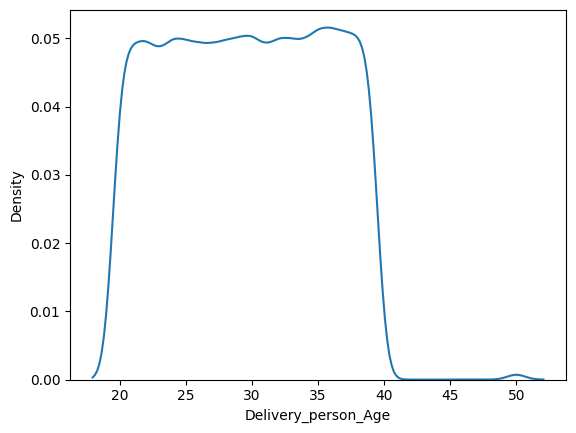

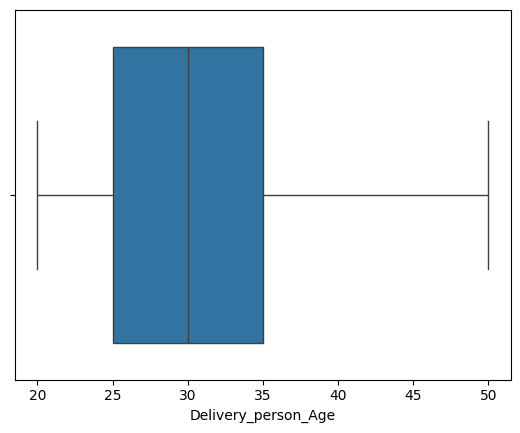

<ipython-input-22-5f9495f20f3e>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Delivery_person_Age'].fillna(dataset['Delivery_person_Age'].mean(),inplace=True)


In [22]:
# Checking the null vlaues %
# In this dataset, we have some columns with missing values, so I decided to fill these missing values

dataset.isnull().sum()/len(dataset)*100

# Ploting 5 number summary , and checking the mean/median and STD
dataset['Delivery_person_Age'].describe()


# Removing below 18 age delivery person dataponts
# we have 38 row where age is below 18

dataset=dataset[dataset['Delivery_person_Age']>=18]

# Checking the distribution of the column, it appears to follow a roughly normal distribution,
# with a larger concentration of data points between 20 and 40. There are some data points below 18,
# which may be errors, so I will remove these data points from the dataset.

sns.kdeplot(dataset['Delivery_person_Age'])
plt.show()

# plot box plot
sns.boxplot(x=dataset['Delivery_person_Age'])
plt.show()

# Filling the null values vie mean of the column
dataset['Delivery_person_Age'].fillna(dataset['Delivery_person_Age'].mean(),inplace=True)


***Filling the null values for Age column***

In [23]:
dataset[dataset['Time_Orderd'].isnull()]

# I decided i will remove the null values for this col

dataset=dataset[~dataset['Time_Orderd'].isnull()]


# Here, I will create a new column to calculate the difference between Time_Ordered and Time_Picked.
# Once this column is created, I will fill in the missing values for Time_Ordered.

# # dataset['time_diff']

dataset['Time_Orderd'] = dataset['Time_Orderd'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else None)
dataset['Time_Order_picked'] = dataset['Time_Order_picked'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else None)


dataset['Time_Orderd'] = dataset['Order_Date'].astype(str) + ' ' + dataset['Time_Orderd']
dataset['Time_Order_picked'] = dataset['Order_Date'].astype(str) + ' ' + dataset['Time_Order_picked']

# Convert combined columns to datetime
dataset['Time_Orderd'] = pd.to_datetime(dataset['Time_Orderd'])
dataset['Time_Order_picked'] = pd.to_datetime(dataset['Time_Order_picked'])


# creating a new col for Min(time order - time order picket )
dataset['time_diff_order_pickup'] = dataset['Time_Order_picked'] - dataset['Time_Orderd']

# New col of minutes calculate



<ipython-input-23-4b05d2287e50>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time_Orderd'] = dataset['Time_Orderd'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else None)


In [24]:
import re

def extract_minutes(time_str):
    # Regular expression to extract minutes from the time string
    match = re.search(r'(\d{2}):(\d{2}):(\d{2})', time_str)
    if match:
        # Extract the minutes part and convert it to an integer
        minutes = int(match.group(2))
        return minutes
    else:
        raise ValueError("Time string does not match the expected format.")


# Applying the function to the 'time_diff_order_pickup' column and creating a new 'minutes' column

dataset['time_diff_order_pickup_minutes'] = dataset['time_diff_order_pickup'].apply(lambda x: extract_minutes(str(x)))

#  here some data is incorrect so iam removing
dataset=dataset[dataset['time_diff_order_pickup_minutes']>0]

dataset['time_diff_order_pickup_minutes'].describe()
# The summary shows that the mean time for order pickup is 9 minutes.
# The standard deviation is 8 minutes, with a minimum time of 5 minutes and a maximum time of 15 minutes, which appears to be correct.

,time_diff_order_pickup_minutes
count,43648.000000
mean,9.991294
std,4.086680
min,5.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,15.000000


In [25]:
# Need to check unique values in each col

# for i in range(Float_col.shape[0]):
#   print(dataset.columns[i])
#   print(dataset[dataset.columns[i]].unique())
#   print()
#   print()

# need to convert into fload datatype

dataset['Delivery_person_Ratings']=dataset['Delivery_person_Ratings'].astype('float')


# Outlier

# sns.boxplot(dataset['Delivery_person_Ratings'])
# there are some outlier in this col so i will remove them
# will use the IQR methodh


Q1 = dataset['Delivery_person_Ratings'].quantile(0.25)
Q3 = dataset['Delivery_person_Ratings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the values that are less than the lower_bound.

dataset=dataset[dataset['Delivery_person_Ratings']>lower_bound]

In [26]:
# Clean Lat or long col data

dataset=dataset[dataset['Restaurant_latitude']>0]


# Using some inbuilt tools for EDA or analysis

In [27]:
# Separate the column
# int col - Scatterplot, 5 number summary, Corr with taret column
# float col - Scatterplot, 5 number summary, Corr with taret column
# object col- Countplot,barchat,linechart


Int_col=dataset.select_dtypes('int').columns
Float_col=dataset.select_dtypes('float').columns
Object_col=dataset.select_dtypes('object').columns

**Using Pandas profiling**

In [28]:
# # pip install ydata-profiling
# from pandas_profiling import ProfileReport
# Report=ProfileReport(dataset)
# Report.to_file(output_file='Report.html')

# Below are some steps I need to take. I obtained this information from Pandas Profiling

* I need to create a time slab for order times. I want to know how many customers placed orders at different times, identify the time with the most orders, and determine which time slot has the highest order volume.
*   I will drope some of the col
*   Weatherconditions- i will clean this col as well
*   In Festival/City col we have some NAN value i will filled with mode








# Droping col

<!-- Order_Date,Time_taken(min) -->

In [29]:
dataset.drop(['Order_Date','Time_taken(min)'],axis=1,inplace=True)

In [30]:
# Fill the NAN values

dataset['City']=dataset['City'].str.replace('NaN ',dataset['City'].mode()[0])

dataset['Festival']=dataset['Festival'].str.replace('NaN ',dataset['Festival'].mode()[0])

dataset['Weatherconditions']=dataset['Weatherconditions'].str.split(" ").str.get(1)


In [31]:
# Need to create a time slab for order_times.

dataset['Time_Orderd'].dt.time
def time_slab(x):
    hour = x.hour
    if 1 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 19:
        return 'Evening'
    else:
        return 'Late Night'

In [32]:
dataset['Time_Orderd'].dt.time.apply

<bound method Series.apply of 0        11:30:00
1        19:45:00
2        08:30:00
3        18:00:00
4        13:30:00
           ...   
45587    21:45:00
45588    11:35:00
45590    23:50:00
45591    13:35:00
45592    17:10:00
Name: Time_Orderd, Length: 38904, dtype: object>

In [33]:
dataset['Delivery_person_Age']=dataset['Delivery_person_Age'].astype(int)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38904 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Delivery_person_Age             38904 non-null  int64          
 1   Delivery_person_Ratings         38904 non-null  float64        
 2   Restaurant_latitude             38904 non-null  float64        
 3   Restaurant_longitude            38904 non-null  float64        
 4   Delivery_location_latitude      38904 non-null  float64        
 5   Delivery_location_longitude     38904 non-null  float64        
 6   Time_Orderd                     38904 non-null  datetime64[ns] 
 7   Time_Order_picked               38904 non-null  datetime64[ns] 
 8   Weatherconditions               38904 non-null  object         
 9   Road_traffic_density            38904 non-null  object         
 10  Vehicle_condition               38904 non-null  int64          

Summary statistics for Type_of_order:
count      38904
unique         4
top       Snack 
freq        9839
Name: Type_of_order, dtype: object



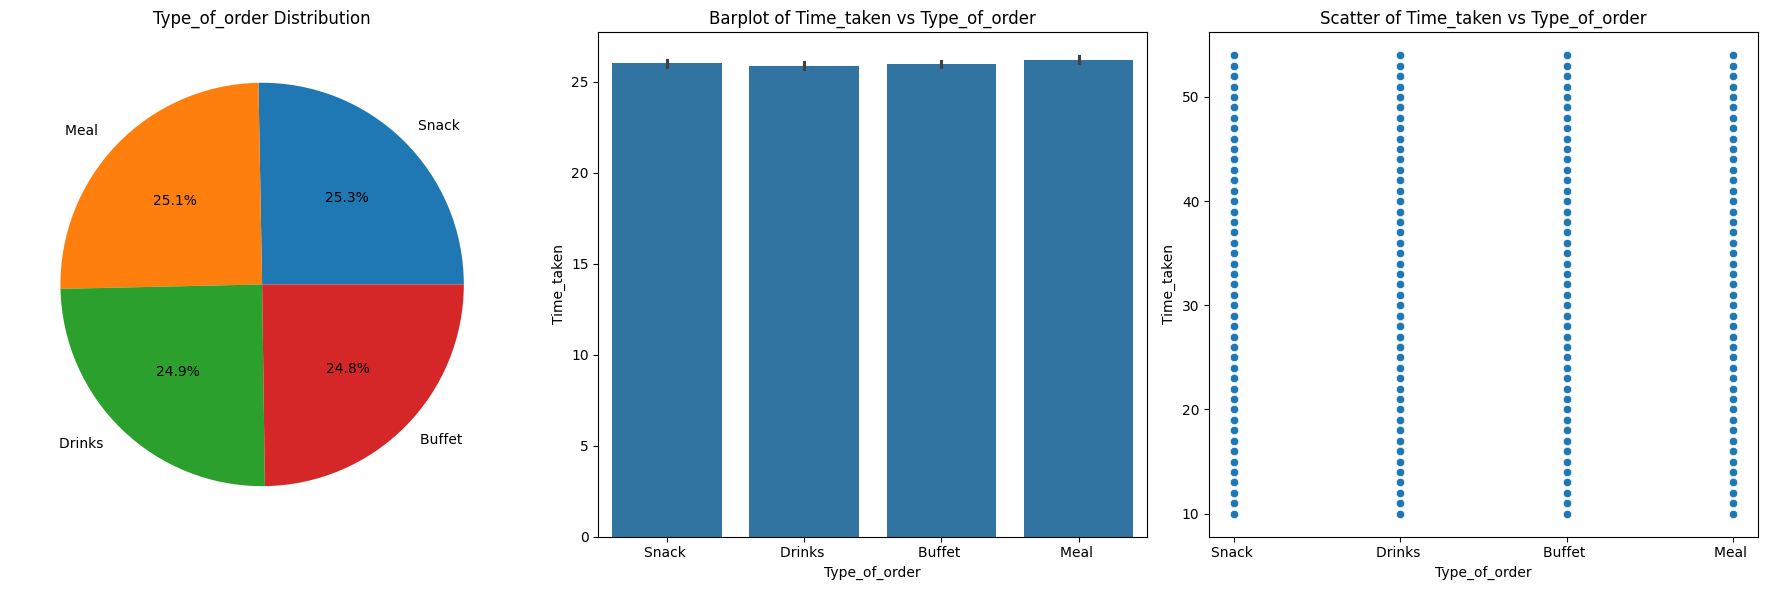

In [39]:
summary_analysis_object(Object_col[2])

In [36]:
# # pip install ydata-profiling
# from pandas_profiling import ProfileReport
# Report=ProfileReport(dataset)
# Report.to_file(output_file='Report.html')

# I am done with the cleaning part, and the next step is to create a Streamlit app for the analysis

In [37]:
dataset.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Distance_km,time_diff_order_pickup,time_diff_order_pickup_minutes
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.02,0 days 00:15:00,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.14,0 days 00:05:00,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.55,0 days 00:15:00,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.77,0 days 00:10:00,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.20,0 days 00:15:00,15


In [38]:
dataset.to_csv("Clean_data.csv")